<a href="https://colab.research.google.com/github/AftabUdaipurwala/MachineLearningBasics/blob/ClassificationModels/DecisionTree_Exercise_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
!ls '/content/drive/MyDrive/py-master/ML/9_decision_tree/Exercise'

9_decision_tree_exercise.ipynb	titanic.csv


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [22]:
df = pd.read_csv('/content/drive/MyDrive/py-master/ML/9_decision_tree/Exercise/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [54]:
inputs = df.drop(['PassengerId','Name','Ticket','Cabin','Survived'], axis=1)
inputs

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [55]:
target = df['Survived']
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [57]:
inputs.describe() # means age has missing values

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,29.699118,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


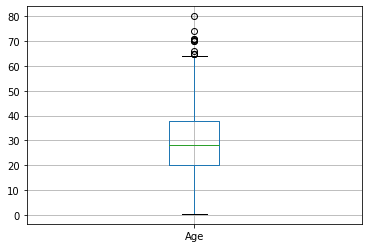

In [26]:
df.boxplot(column=['Age'])

In [56]:
# replacing missing values with median value
inputs['Age']= inputs['Age'].fillna(np.mean(inputs['Age']))
inputs.describe()


,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,29.699118,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [58]:
df.apply(lambda x: x.value_counts()).T.stack()

PassengerId  1       1.0
             2       1.0
             3       1.0
             4       1.0
             5       1.0
                   ...  
Cabin        G6      4.0
             T       1.0
Embarked     C     168.0
             Q      77.0
             S     644.0
Length: 2970, dtype: float64

In [59]:
inputs['Embarked'] = inputs['Embarked'].fillna("S")

In [60]:
inputs.isna().sum().to_dict()

{'Age': 0,
 'Embarked': 0,
 'Fare': 0,
 'Parch': 0,
 'Pclass': 0,
 'Sex': 0,
 'SibSp': 0}

In [61]:
inputs

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.699118,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


In [62]:
from sklearn.preprocessing import LabelEncoder
lesex = LabelEncoder()
leemb = LabelEncoder()

In [63]:
inputs['Sex_n'] = lesex.fit_transform(inputs['Sex'])
inputs['Embarked_n'] = leemb.fit_transform(inputs['Embarked'])

In [64]:
inputs

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_n,Embarked_n
0,3,male,22.000000,1,0,7.2500,S,1,2
1,1,female,38.000000,1,0,71.2833,C,0,0
2,3,female,26.000000,0,0,7.9250,S,0,2
3,1,female,35.000000,1,0,53.1000,S,0,2
4,3,male,35.000000,0,0,8.0500,S,1,2
...,...,...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S,1,2
887,1,female,19.000000,0,0,30.0000,S,0,2
888,3,female,29.699118,1,2,23.4500,S,0,2
889,1,male,26.000000,0,0,30.0000,C,1,0


In [65]:
drop = inputs.drop(['Sex','Embarked'],axis=1)

In [66]:
drop

,Pclass,Age,SibSp,Parch,Fare,Sex_n,Embarked_n
0,3,22.000000,1,0,7.2500,1,2
1,1,38.000000,1,0,71.2833,0,0
2,3,26.000000,0,0,7.9250,0,2
3,1,35.000000,1,0,53.1000,0,2
4,3,35.000000,0,0,8.0500,1,2
...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1,2
887,1,19.000000,0,0,30.0000,0,2
888,3,29.699118,1,2,23.4500,0,2
889,1,26.000000,0,0,30.0000,1,0


In [75]:
from sklearn.model_selection import train_test_split

In [76]:
xtrain, xtest, ytrain, ytest = train_test_split(drop,target, test_size=0.2)

In [77]:
from sklearn import tree
model= tree.DecisionTreeClassifier(random_state=123)
model.fit(xtrain,ytrain)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [78]:
model.score(xtest,ytest)

0.7932960893854749

In [79]:
model.predict([[3,22,1,0,7.25,1,2]])

array([0])

In [80]:
from sklearn.metrics import confusion_matrix
ypred= model.predict(xtest)
cm = confusion_matrix(ypred, ytest)
cm

array([[94, 16],
       [21, 48]])